In [1]:
    # #4 Linear Regression

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file = pd.read_csv("regdata.csv",header=None)

In [3]:

def prepare(data):
    X = data.iloc[:,0:-1].values

    # we normalize X
    maxX = np.max(X, axis=0)
    minX = np.min(X, axis=0)
    X = (X-minX)/(maxX-minX)

    X = np.insert(X, 0, 1, axis=1)

    y = data.iloc[:,-1:].values 

    return X,y

X,y = prepare(file)
print(X.shape)
print(y.shape)

(25, 3)
(25, 1)


In [18]:
w = np.ones((1,X.shape[1]))
n = X.shape[0]

#TODO
def error(x,y,w):

    E_fn = (y.T-w@X.T)**2
    return E_fn

#TODO
def error_mean(X,y,w):

    l = error(X,y,w)
    m = (1/(2*n))*(np.sum(l))
    return m

print(error_mean(X,y,w))

2395.1439179687504


In [19]:
#TODO
def grad(x,y,w):
    
    fn = (y.T - w@x.T)@x
#     print(fn)
    return fn

#TODO
def grad_mean(X,y,w):

    f = (1/n)*(np.sum(grad(X,y,w),axis=0,keepdims=True))
    return f

print(grad_mean(X,y,w))

[[68.19825    35.45908594 37.46407813]]


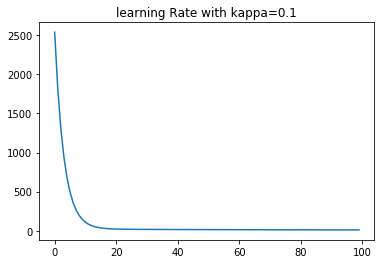

In [21]:
def fit(X,y,kappa,iter):
    w = np.zeros((1,X.shape[1]))
    E = []

    #TODO  
    for i in range(iter):
        E.append(error_mean(X,y,w))
        w += (kappa)*(grad_mean(X,y,w))
    return w,E

w,E = fit(X,y,0.1,100)
plt.title("learning Rate with kappa=0.1")
plt.plot(E)
plt.show()


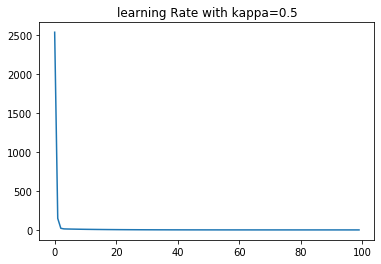

In [7]:
w,E = fit(X,y,0.5,100)
plt.title("learning Rate with kappa=0.5")
plt.plot(E)
plt.show()

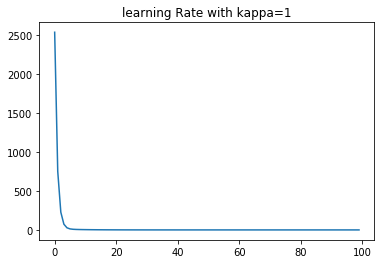

In [8]:
w,E = fit(X,y,1,100)
plt.title("learning Rate with kappa=1")
plt.plot(E)
plt.show()